In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,r2_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

In [125]:
train=pd.read_csv('train.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [126]:
train.drop(['employee_id'],axis=1,inplace=True)

In [127]:
train=train.rename(columns={'KPIs_met >80%':'KPI_more_than_80','awards_won?':'awards_won'})

In [128]:
train.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPI_more_than_80           0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [129]:
train.shape

(54808, 13)

In [130]:
train.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,KPI_more_than_80,awards_won,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPI_more_than_80,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


In [131]:
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

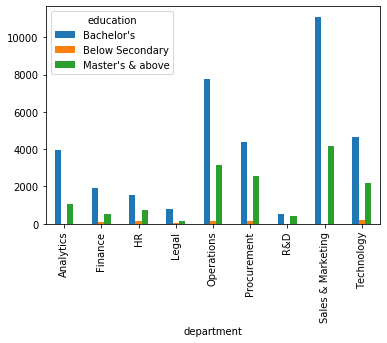

In [132]:
pd.crosstab(train.department, train.education).plot(kind='bar');

In [133]:
train['education'] = train.groupby(['department'])['education'].transform(lambda x: x.fillna(x.mode()[0]))

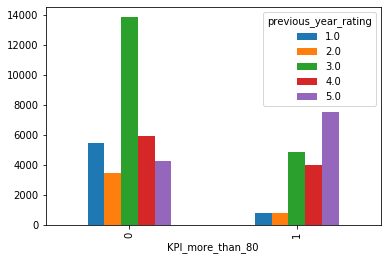

In [134]:
pd.crosstab(train.KPI_more_than_80, train.previous_year_rating).plot(kind='bar');

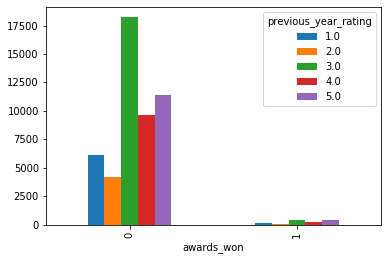

In [135]:
pd.crosstab(train.awards_won, train.previous_year_rating).plot(kind='bar');

In [136]:
train['previous_year_rating'] = train.groupby(['awards_won'])['previous_year_rating'].transform(lambda x: x.fillna(x.mode()[0]))

In [137]:
test=pd.read_csv('test.csv')

In [138]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [139]:
test.drop(['employee_id'],axis=1,inplace=True)
test=test.rename(columns={'KPIs_met >80%':'KPI_more_than_80','awards_won?':'awards_won'})
test['education'] = test.groupby(['department'])['education'].transform(lambda x: x.fillna(x.mode()[0]))
test['previous_year_rating'] = test.groupby(['awards_won'])['previous_year_rating'].transform(lambda x: x.fillna(x.mode()[0]))

In [140]:
from sklearn.preprocessing import LabelEncoder

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [142]:
X=train.drop(['is_promoted'],axis=1)
y=train['is_promoted']

In [143]:
X=X.apply(LabelEncoder().fit_transform)
test = test.apply(LabelEncoder().fit_transform)

In [144]:
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_more_than_80,awards_won,avg_training_score
0,7,31,2,0,2,0,15,4,7,1,0,10
1,4,14,0,1,0,0,10,4,3,0,0,21
2,7,10,0,1,2,0,14,2,6,0,0,11
3,7,15,0,1,0,1,19,0,9,0,0,11
4,8,18,0,1,0,0,25,2,1,0,0,34


In [145]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=3)

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
# sc=StandardScaler()

# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)
# test=sc.fit_transform(test)

# Logistic regression

In [148]:
lm=LogisticRegression()

In [149]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
lm.score(X_test,y_test)

0.9178222157349292

In [151]:
subm=pd.read_csv('sample_submission.csv')
subm.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


# Decision Tree

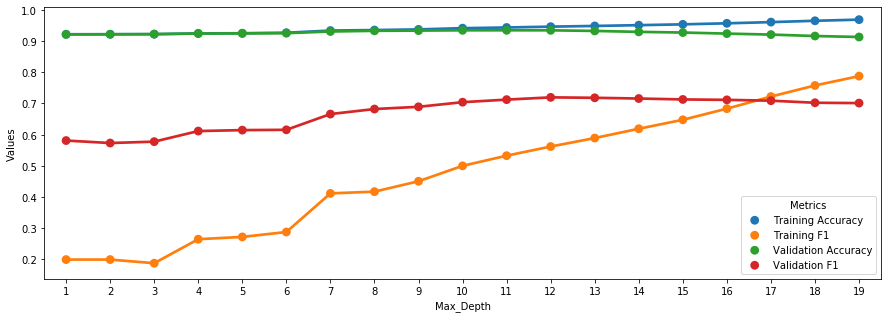

In [152]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    
Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

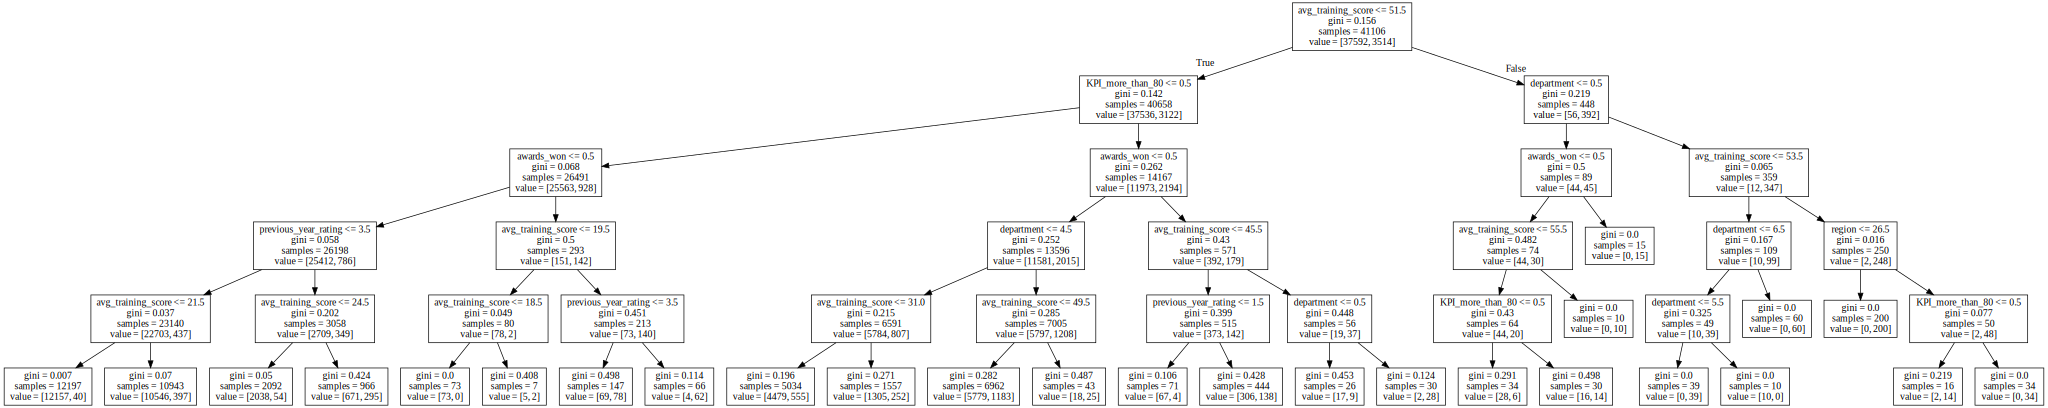

In [153]:
import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 5)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

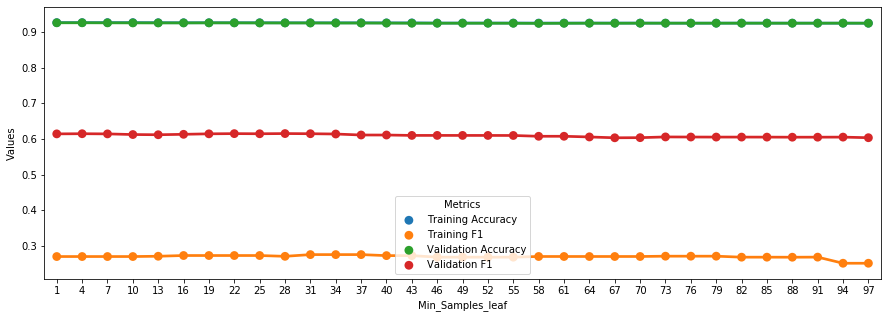

In [154]:

training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,100,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [155]:
dtree= DecisionTreeClassifier(max_depth=5,min_samples_leaf=50)

In [156]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [157]:
dtree.score(X_test,y_test)

0.9254853306086702

In [158]:
y_pred=dtree.predict(X_test)

In [159]:
confusion_matrix(y_test,y_pred)

array([[12513,    35],
       [  986,   168]], dtype=int64)

# Random Forest

In [160]:
rf=RandomForestClassifier()

In [161]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [162]:
rf.score(X_test,y_test)

0.926215151072836

In [163]:
y_rf=rf.predict(X_test)

In [164]:
confusion_matrix(y_test,y_rf)

array([[12438,   110],
       [  901,   253]], dtype=int64)

In [165]:
bagg_rf=BaggingClassifier(RandomForestClassifier(),n_estimators=100,max_samples=0.80,random_state=3)

In [166]:
bagg_rf.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators='warn',
                                                        n_jobs=None,
    

In [167]:
bagg_rf.score(X_test,y_test)

0.93146985841483

In [168]:
y_brf=bagg_rf.predict(X_test)

In [169]:
confusion_matrix(y_test,y_brf)

array([[12520,    28],
       [  911,   243]], dtype=int64)

# Bagging Decision tree

In [170]:
bag_dtree=BaggingClassifier(DecisionTreeClassifier(max_depth=5,min_samples_leaf=50),n_estimators=200,max_samples=0.70,random_state=3)

In [171]:
bag_dtree.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=50,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

In [172]:
bag_dtree.score(X_test,y_test)

0.9250474383301708

In [173]:
y_pred=bag_dtree.predict(X_test)

In [174]:
confusion_matrix(y_test,y_pred)

array([[12520,    28],
       [  999,   155]], dtype=int64)

# Boosting

In [175]:
import xgboost

In [176]:
classifier=xgboost.XGBClassifier()

In [177]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [178]:
classifier.score(X_test,y_test)

0.933732301853744

In [179]:
y_xgb=classifier.predict(X_test)

In [180]:
confusion_matrix(y_test,y_xgb)

array([[12526,    22],
       [  886,   268]], dtype=int64)

# Generating output for model submission

In [181]:
y_pred1=classifier.predict(test)
pred1=pd.DataFrame(y_pred1)
sub_df=pd.read_csv('sample_submission.csv')
dataset=pd.concat([sub_df['employee_id'],pred1],axis=1)
dataset.columns=['employee_id','is_promoted']
dataset.to_csv('submission02.csv',index=False)